## Projeto Cassandra

SQL é usado em bancos de dados relacionais, que armazenam dados em tabelas com linhas e colunas. Ele é bom para dados estruturados e com regras fixas. Exemplo: MySQL.

NoSQL é mais flexível e lida bem com dados não estruturados ou grandes volumes de dados. Ele pode usar documentos, chave-valor, ou grafos. Exemplo: MongoDB.

Diferença principal: SQL é melhor para dados organizados, normalizados e consistentes, enquanto NoSQL é mais flexível e escalável (não-normalizado).

Dataset original encontrado em:
https://www.kaggle.com/datasets/davidcariboo/player-scores/data?select=games.csv

Dados do Transfermarkt sobre o jogo de futebol.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### Load csv

In [2]:
# Carregar os arquivos CSV em DataFrames
appearances_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/appearances.csv")
club_games_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/club_games.csv")
clubs_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clubs.csv")
competitions_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/competitions.csv")
game_events_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/game_events.csv")
game_lineups_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/game_lineups.csv")
games_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/games.csv")
player_valuations_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/player_valuations.csv")
players_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/players.csv")
transfers_df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/transfers.csv")

# Dicionário contendo seus DataFrames
dataframes = {
    'appearances': appearances_df,
    'club_games': club_games_df,
    'clubs': clubs_df,
    'competitions': competitions_df,
    'game_events': game_events_df,
    'game_lineups': game_lineups_df,
    'games': games_df,
    'player_valuations': player_valuations_df,
    'players': players_df,
    'transfers': transfers_df
}

### Functions

In [3]:
# Função para calcular a completude de cada coluna
def check_completeness(df):
    if df.empty:
        print("O DataFrame está vazio!")
        return pd.DataFrame()
   
    completeness_report = []
    total_rows = len(df)
   
    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / total_rows) * 100
        completeness_report.append({
            'nome_coluna': column,
            'null%': round(null_percentage, 2),
            'qtd_total_linhas': total_rows,
            'qtd_nulos': null_count
        })
   
    completeness_df = pd.DataFrame(completeness_report)
    print(completeness_df)
    print("="*40)
    return completeness_df

# Função para exibir os tipos de dados de todas as colunas
def show_data_types(df, name):
    print(f"\nTipos de Dados do DataFrame: {name}")
    print(df.dtypes)
    print("="*40)

# Função para alterar o tipo das colunas que possuem 'date' no nome para datetime
def convert_date_columns(df):
    for column in df.columns:
        if 'date' in column.lower():  # Verifica se 'date' está no nome da coluna
            df[column] = pd.to_datetime(df[column], errors='coerce')
    return df


# Função para filtrar dados de anos específicos na coluna 'date'
def filter_by_date(df):
    for column in df.columns:
        if 'date' in column.lower():  # Verifica se 'date' está no nome da coluna
            df = df[df[column].dt.year.isin([2020, 2021, 2022, 2023, 2024])]
    return df


def clean_null_dataframe(df):
    # Iterar sobre cada coluna do DataFrame
    for col in df.columns:
        # Verificar se a coluna está completamente nula
        if df[col].isna().all():  # Verifica se todos os valores são NaN ou None
            df = df.drop(col, axis=1)
        else:
            # Substituir NaN com base no tipo da coluna
            if df[col].dtype == 'object':  # Tipo texto (Object no pandas)
                df[col] = df[col].fillna('Unknown')
            elif df[col].dtype == 'float64':  # Tipo float
                df[col] = df[col].fillna(0.0)
            elif df[col].dtype == 'int64':  # Tipo inteiro
                df[col] = df[col].fillna(0)
            elif df[col].dtype == 'datetime64[ns]':  # Tipo datetime
                # Substituir valores nulos por uma data fictícia '01-01-1900'
                df[col] = df[col].fillna(pd.to_datetime('1900-01-01'))
            else:
                # Para outros tipos de dados (caso haja algum inesperado)
                df[col] = df[col].fillna('Unknown')
    return df




### Tratamento

In [4]:
#Complitude e null clean
for name, df in dataframes.items():
     # Chamar a função de conversão de datas para todos os DataFrames
    dataframes[name] = clean_null_dataframe(df)
    print(f"\nAnalisando completude para o DataFrame: {name}")
    check_completeness(df)  # Calcular a completude


Analisando completude para o DataFrame: appearances
               nome_coluna  null%  qtd_total_linhas  qtd_nulos
0            appearance_id    0.0           1639881          0
1                  game_id    0.0           1639881          0
2                player_id    0.0           1639881          0
3           player_club_id    0.0           1639881          0
4   player_current_club_id    0.0           1639881          0
5                     date    0.0           1639881          0
6              player_name    0.0           1639881          0
7           competition_id    0.0           1639881          0
8             yellow_cards    0.0           1639881          0
9                red_cards    0.0           1639881          0
10                   goals    0.0           1639881          0
11                 assists    0.0           1639881          0
12          minutes_played    0.0           1639881          0

Analisando completude para o DataFrame: club_games
             

In [5]:
for name, df in dataframes.items():    
    # Chamar a função de conversão de datas para todos os DataFrames
    dataframes[name] = convert_date_columns(df)
    
    # Filtrar os dados para 2020 e 2024 apenas nos DataFrames apropriados
    if name in ['appearances', 'game_events', 'game_lineups', 'games', 'player_valuations']:
        dataframes[name] = filter_by_date(dataframes[name])
    
    # Exibir os tipos de dados
    show_data_types(dataframes[name], name)


Tipos de Dados do DataFrame: appearances
appearance_id                     object
game_id                            int64
player_id                          int64
player_club_id                     int64
player_current_club_id             int64
date                      datetime64[ns]
player_name                       object
competition_id                    object
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

Tipos de Dados do DataFrame: club_games
game_id                    int64
club_id                    int64
own_goals                float64
own_position             float64
own_manager_name          object
opponent_id                int64
opponent_goals           float64
opponent_position        float64
opponent_manager_name     object
hosting                   object
is_win                     int64
dtype: 

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_5136\303887935.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')


In [6]:
for name, df in dataframes.items():  
    # Salvar o DataFrame modificado em um novo arquivo CSV
    save_path = f"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/{name}_cleaned.csv"
    dataframes[name].to_csv(save_path, index=False)
    print(f"DataFrame {name} salvo em: {save_path}")

DataFrame appearances salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/appearances_cleaned.csv
DataFrame club_games salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/club_games_cleaned.csv
DataFrame clubs salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/clubs_cleaned.csv
DataFrame competitions salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/competitions_cleaned.csv
DataFrame game_events salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_events_cleaned.csv
DataFrame game_lineups salvo em: C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_lineups_cleaned.csv
DataFrame games salvo em: C:/Users/Gustavo/Documents/Git

### Novo dataframe

In [7]:
# Carregar os arquivos CSV em DataFrames
appearances_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/appearances_cleaned.csv")
club_games_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/club_games_cleaned.csv")
clubs_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/clubs_cleaned.csv")
competitions_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/competitions_cleaned.csv")
game_events_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_events_cleaned.csv")
game_lineups_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_lineups_cleaned.csv")
games_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/games_cleaned.csv")
player_valuations_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/player_valuations_cleaned.csv")
players_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/players_cleaned.csv")
transfers_df_cleaned = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/transfers_cleaned.csv")

# Dicionário contendo seus DataFrames
dataframes_cleaned = {
    'appearances': appearances_df_cleaned,
    'club_games': club_games_df_cleaned,
    'clubs': clubs_df_cleaned,
    'competitions': competitions_df_cleaned,
    'game_events': game_events_df_cleaned,
    'game_lineups': game_lineups_df_cleaned,
    'games': games_df_cleaned,
    'player_valuations': player_valuations_df_cleaned,
    'players': players_df_cleaned,
    'transfers': transfers_df_cleaned
}


#Complitude e null clean
for name, df in dataframes_cleaned.items():
     # Chamar a função de conversão de datas para todos os DataFrames
    print(f"\nAnalisando completude para o DataFrame: {name}")
    check_completeness(df)  # Calcular a completude
    show_data_types(df,name)


Analisando completude para o DataFrame: appearances
               nome_coluna  null%  qtd_total_linhas  qtd_nulos
0            appearance_id    0.0            658371          0
1                  game_id    0.0            658371          0
2                player_id    0.0            658371          0
3           player_club_id    0.0            658371          0
4   player_current_club_id    0.0            658371          0
5                     date    0.0            658371          0
6              player_name    0.0            658371          0
7           competition_id    0.0            658371          0
8             yellow_cards    0.0            658371          0
9                red_cards    0.0            658371          0
10                   goals    0.0            658371          0
11                 assists    0.0            658371          0
12          minutes_played    0.0            658371          0

Tipos de Dados do DataFrame: appearances
appearance_id          

In [ ]:
# Caminho para os arquivos CSV limpos
club_games_path = r"C:\Users\Gustavo\Documents\GitHub\data-engineer-portfolio\especialization-bigdata\Cassandra\data\clean\club_games_cleaned.csv"
clubs_path = r"C:\Users\Gustavo\Documents\GitHub\data-engineer-portfolio\especialization-bigdata\Cassandra\data\clean\clubs_cleaned.csv"
games_path = r"C:\Users\Gustavo\Documents\GitHub\data-engineer-portfolio\especialization-bigdata\Cassandra\data\clean\games_cleaned.csv"
appearances_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/appearances_cleaned.csv")
competitions_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/competitions_cleaned.csv")
game_events_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_events_cleaned.csv")
game_lineups__path= r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/game_lineups_cleaned.csv")
player_valuations_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/player_valuations_cleaned.csv")
players_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/players_cleaned.csv")
transfers_path = r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/transfers_cleaned.csv")




## Perguntas

1. Qual a performance dos clubes por temporada?
2. Qual o melhor jogador atacante custo x beneficio?

In [ ]:

# Carregar os DataFrames
club_games_df = pd.read_csv(club_games_path, usecols=['game_id', 'club_id', 'own_goals', 'opponent_goals', 'hosting', 'is_win'])
clubs_df = pd.read_csv(clubs_path, usecols=['club_id', 'name'])
games_df = pd.read_csv(games_path, usecols=['game_id', 'date', 'season'])

# Mesclar os DataFrames para incluir o nome do clube e a temporada
merged_df = pd.merge(club_games_df, clubs_df, on='club_id', how='inner')
merged_df = pd.merge(merged_df, games_df, on='game_id', how='inner')


In [9]:
# Inicie o Cassandra no Docker se ele já não estiver rodando
!docker start cassandra_db || docker run --name cassandra_db -d -p 9042:9042 cassandra:latest

# Aguardar alguns segundos para garantir que o Cassandra seja iniciado
import time
time.sleep(60)


cassandra_db


In [18]:

from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

# Configuração de autenticação se necessário, para Cassandra no Docker geralmente não é preciso
cluster = Cluster(['127.0.0.1'])  # Conectando ao Cassandra local
session = cluster.connect()

# Criação do Keyspace
session.execute("""
CREATE KEYSPACE IF NOT EXISTS football_db
WITH replication = {'class': 'SimpleStrategy', 'replication_factor': '1'}
""")

# Selecionando o Keyspace
session.set_keyspace('football_db')
# Dropar a tabela player_scores caso ela já exista
session.execute("DROP TABLE IF EXISTS player_scores")
# Dropar a tabela player_scores caso ela já exista
session.execute("DROP TABLE IF EXISTS club_game_performance")

# Criação da Tabela para armazenar os dados
session.execute("""
CREATE TABLE IF NOT EXISTS club_game_performance (
    game_id int,
    name text,
    own_goals float,
    opponent_goals float,
    hosting text,
    is_win int,
    season text,
    PRIMARY KEY (game_id, name)
)
""")



In [17]:
# Inserir os dados mesclados na tabela
insert_query = """
INSERT INTO club_game_performance (game_id, name, own_goals, opponent_goals, hosting, is_win, season)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

for _, row in merged_df.iterrows():
    session.execute(insert_query, (
        int(row['game_id']),
        str(row['name']),
        int(row['own_goals']),
        int(row['opponent_goals']),
        row['hosting'],
        int(row['is_win']),
        str(row['season'])  
    ))

print("Dados inseridos com sucesso na tabela club_game_performance!")


Dados inseridos com sucesso na tabela club_game_performance!


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_5136\1506755968.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_by_season.index, y=win_by_season.values, palette='viridis')


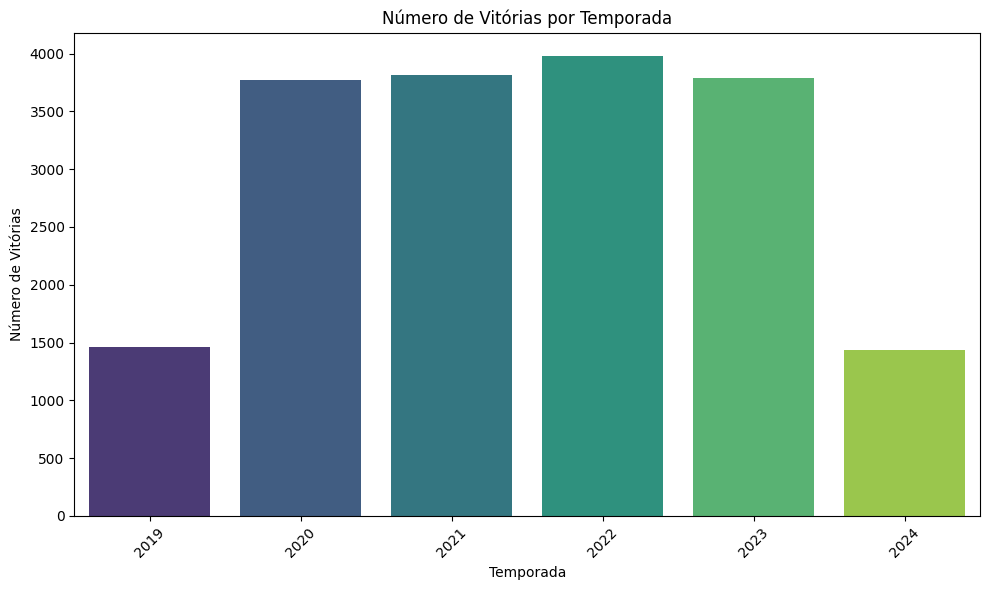

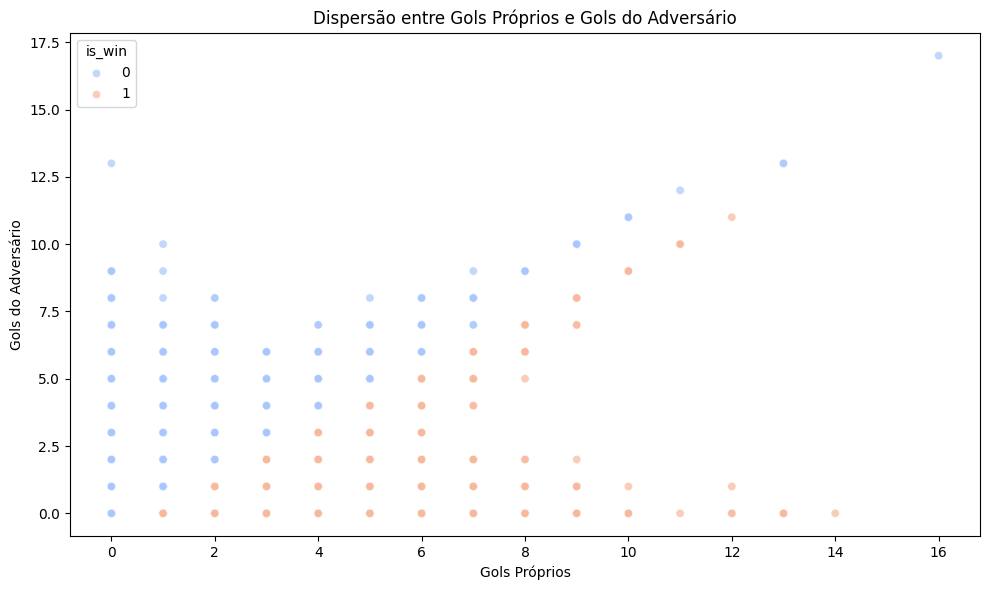

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que merged_df seja um DataFrame com os dados já carregados no Python
# Vamos primeiro criar um gráfico de barras para vitórias por temporada
win_by_season = merged_df.groupby('season')['is_win'].sum()

# Gráfico de Barras: Vitórias por temporada
plt.figure(figsize=(10, 6))
sns.barplot(x=win_by_season.index, y=win_by_season.values, palette='viridis')
plt.title('Número de Vitórias por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de Vitórias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agora, criaremos o gráfico de dispersão entre gols próprios e gols do adversário
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['own_goals'], y=merged_df['opponent_goals'], hue=merged_df['is_win'], palette='coolwarm', alpha=0.7)
plt.title('Dispersão entre Gols Próprios e Gols do Adversário')
plt.xlabel('Gols Próprios')
plt.ylabel('Gols do Adversário')
plt.tight_layout()
plt.show()


# Pergunta2

In [21]:
# Carregar os dados dos arquivos CSV limpos
club_games_clean_df = pd.read_csv(r"C:\Users\Gustavo\Documents\GitHub\data-engineer-portfolio\especialization-bigdata\Cassandra\data\clean\club_games_cleaned.csv")
appearances_clean_df = pd.read_csv(r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/appearances_cleaned.csv")
player_valuations_clean_df = pd.read_csv(r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/player_valuations_cleaned.csv")
players_clean_df = pd.read_csv(r"C:/Users/Gustavo/Documents/GitHub/data-engineer-portfolio/especialization-bigdata/Cassandra/data/clean/players_cleaned.csv")



In [24]:
# Certifique-se de que 'date' está no formato datetime
appearances_clean_df['date'] = pd.to_datetime(appearances_clean_df['date'], errors='coerce')

# Crie a coluna 'year' a partir de 'date'
appearances_clean_df['year'] = appearances_clean_df['date'].dt.year

# Filtre jogadores com posição "Attack"
attack_players = players_clean_df[players_clean_df['position'] == 'Attack'][['player_id', 'name']]

# Agrupe o desempenho dos jogadores por ano (total de gols e assistências)
performance = appearances_clean_df.groupby(['player_id', 'year']).agg(
    total_goals=('goals', 'sum'),
    total_assists=('assists', 'sum')
).reset_index()

# Calcule o valor de mercado médio por jogador e ano
player_valuations_clean_df['date'] = pd.to_datetime(player_valuations_clean_df['date'], errors='coerce')
player_valuations_clean_df['year'] = player_valuations_clean_df['date'].dt.year

market_values = player_valuations_clean_df.groupby(['player_id', 'year']).agg(
    avg_market_value=('market_value_in_eur', 'mean')
).reset_index()

# Combine desempenho com valor de mercado
combined_df = performance.merge(market_values, on=['player_id', 'year'], how='inner')

# Calcule o custo-benefício
combined_df['cost_benefit'] = combined_df['total_goals'] + combined_df['total_assists'] / combined_df['avg_market_value']

# Mescle com o nome dos jogadores
result = combined_df.merge(attack_players, on='player_id', how='left')

# Classifique o ranking pelo melhor custo-benefício em cada ano
result = result.sort_values(['year', 'cost_benefit'], ascending=[True, False])

# Exiba o resultado
print(result)


       player_id  year  total_goals  total_assists  avg_market_value  \
1111       38253  2020           45             13        58000000.0   
77          8198  2020           41              6        60000000.0   
5389       96341  2020           35              5        82000000.0   
5829      105521  2020           34              6        45000000.0   
25099     418560  2020           33              6        78400000.0   
...          ...   ...          ...            ...               ...   
38890    1287735  2024            0              0           50000.0   
38892    1294049  2024            0              0          100000.0   
38893    1294052  2024            0              0          150000.0   
38894    1296876  2024            0              0          500000.0   
38895    1302421  2024            0              0          100000.0   

       cost_benefit                name  
1111           45.0  Robert Lewandowski  
77             41.0   Cristiano Ronaldo  
5389     

In [ ]:

# Conectar ao Cassandra e criar uma nova tabela para armazenar o DataFrame
cluster = Cluster(['127.0.0.1'])
session = cluster.connect()

# Criar o keyspace, se ainda não existir
session.execute("""
CREATE KEYSPACE IF NOT EXISTS football_db
WITH replication = {'class': 'SimpleStrategy', 'replication_factor': '1'}
""")
session.set_keyspace('football_db')

# Criar a tabela de métricas no Cassandra
session.execute("DROP TABLE IF EXISTS attack_player_metrics")
session.execute("""
CREATE TABLE IF NOT EXISTS attack_player_metrics (
    player_id int,
    name text,
    year int,
    total_goals int,
    total_assists int,
    avg_market_value float,
    cost_benefit float,
    PRIMARY KEY (year, cost_benefit, player_id)
) WITH CLUSTERING ORDER BY (cost_benefit DESC)
""")

In [31]:

# 3. Inserir os dados do DataFrame no Cassandra
insert_query = """
INSERT INTO attack_player_metrics (player_id, name, year, total_goals, total_assists, avg_market_value, cost_benefit)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""
for _, row in result.iterrows():
    session.execute(insert_query, (
        int(row['player_id']),
        str(row['name']),
        int(row['year']),
        int(row['total_goals']),
        int(row['total_assists']),
        float(row['avg_market_value']),
        float(row['cost_benefit'])
    ))

print("Dados inseridos na tabela attack_player_metrics com sucesso!")


Dados inseridos na tabela attack_player_metrics com sucesso!


In [35]:
# Exibir ranking dos jogadores com melhor custo-benefício em cada temporada
query = """
SELECT year, name, total_goals, total_assists, avg_market_value, cost_benefit
FROM attack_player_metrics
"""
rows = session.execute(query)

# Exibir os resultados como um ranking
print("\nRanking dos jogadores (Custo-Benefício):")
for row in rows:
    print(f"Ano: {row.year}, Jogador: {row.name}, Gols: {row.total_goals}, Assistências: {row.total_assists}, "
          f"Valor Médio de Mercado: {row.avg_market_value}, Custo-Benefício: {row.cost_benefit:.4f}")


Ranking dos jogadores (Custo-Benefício):
Ano: 2022, Jogador: Kylian Mbappé, Gols: 41, Assistências: 16, Valor Médio de Mercado: 166666672.0, Custo-Benefício: 41.0000
Ano: 2022, Jogador: Robert Lewandowski, Gols: 38, Assistências: 8, Valor Médio de Mercado: 45000000.0, Custo-Benefício: 38.0000
Ano: 2022, Jogador: nan, Gols: 37, Assistências: 14, Valor Médio de Mercado: 75000000.0, Custo-Benefício: 37.0000
Ano: 2022, Jogador: Erling Haaland, Gols: 36, Assistências: 6, Valor Médio de Mercado: 160000000.0, Custo-Benefício: 36.0000
Ano: 2022, Jogador: Karim Benzema, Gols: 32, Assistências: 8, Valor Médio de Mercado: 32500000.0, Custo-Benefício: 32.0000
Ano: 2022, Jogador: Mehdi Taremi, Gols: 31, Assistências: 17, Valor Médio de Mercado: 19000000.0, Custo-Benefício: 31.0000
Ano: 2022, Jogador: Harry Kane, Gols: 30, Assistências: 11, Valor Médio de Mercado: 90000000.0, Custo-Benefício: 30.0000
Ano: 2022, Jogador: Wissam Ben Yedder, Gols: 26, Assistências: 5, Valor Médio de Mercado: 22333334.

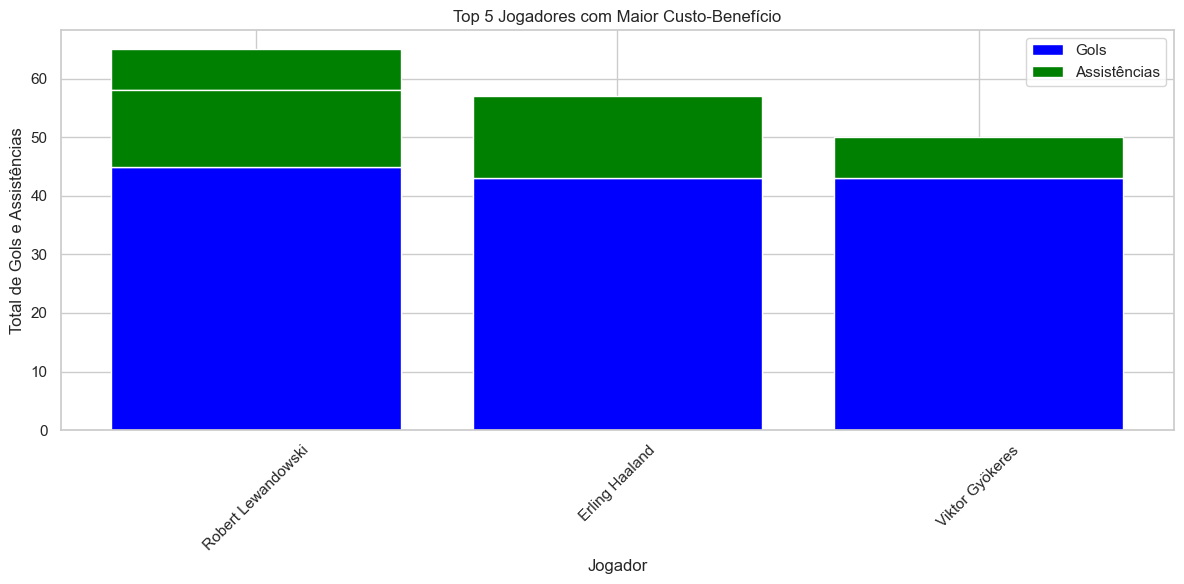

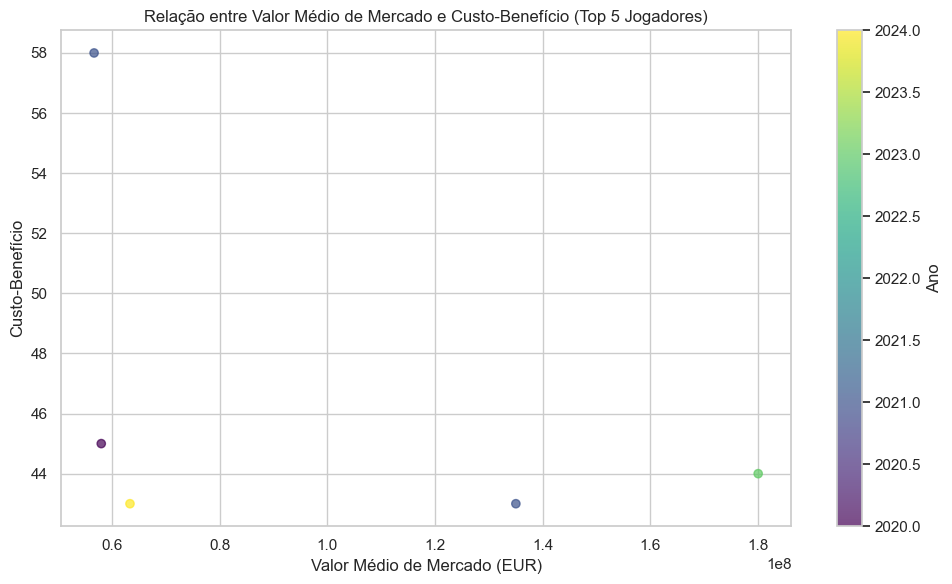

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que os nomes dos jogadores estão em formato string
result['name'] = result['name'].fillna('Desconhecido')  # Substituir NaN por um valor padrão
result['name'] = result['name'].astype(str)  # Garantir que todos os valores sejam strings

# Filtrar os top 5 jogadores com base no Custo-Benefício
top_5_players = result.nlargest(5, 'cost_benefit')

# Gráfico de barras: Total de Gols e Assistências por Jogador
plt.figure(figsize=(12, 6))
plt.bar(top_5_players['name'], top_5_players['total_goals'], color='blue', label='Gols')
plt.bar(top_5_players['name'], top_5_players['total_assists'], bottom=top_5_players['total_goals'], color='green', label='Assistências')
plt.xlabel("Jogador")
plt.ylabel("Total de Gols e Assistências")
plt.title(f"Top 5 Jogadores com Maior Custo-Benefício")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de dispersão: Valor Médio de Mercado vs Custo-Benefício para os Top 5
plt.figure(figsize=(10, 6))
plt.scatter(top_5_players['avg_market_value'], top_5_players['cost_benefit'], c=top_5_players['year'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Ano')
plt.xlabel("Valor Médio de Mercado (EUR)")
plt.ylabel("Custo-Benefício")
plt.title("Relação entre Valor Médio de Mercado e Custo-Benefício (Top 5 Jogadores)")
plt.tight_layout()
plt.show()


In [ ]:
# # Encerrar a sessão e o cluster para liberar recursos
# session.shutdown()
# cluster.shutdown()
